In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

## 1. Data Processing and Exploration

In [34]:
filepath = "./Frogs_MFCCs.csv"
data = pd.read_csv(filepath)
metadata_columns = ['Family', 'Genus', 'Species', 'RecordID']
mfcc_data = data[data.columns.difference(metadata_columns)]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

### 1.1 Exploratory Data Analysis

In [35]:
mfcc_data.describe()  # summary statistics

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,0.150945,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.206880,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.644116,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.002859,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,0.196921,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.324589,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.945710,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207


In [36]:
mfcc_data.nunique()  # number of unique values in each column

MFCCs_ 1     249
MFCCs_ 2    7140
MFCCs_ 3    7026
MFCCs_ 4    7175
MFCCs_ 5    7195
MFCCs_ 6    7195
MFCCs_ 7    7195
MFCCs_ 8    7195
MFCCs_ 9    7195
MFCCs_10    7195
MFCCs_11    7195
MFCCs_12    7195
MFCCs_13    7195
MFCCs_14    7195
MFCCs_15    7195
MFCCs_16    7195
MFCCs_17    7195
MFCCs_18    7195
MFCCs_19    7195
MFCCs_20    7195
MFCCs_21    7195
MFCCs_22    7195
dtype: int64

In [37]:
mfcc_data.isnull().sum()  # number of missing values in each column

MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
dtype: int64

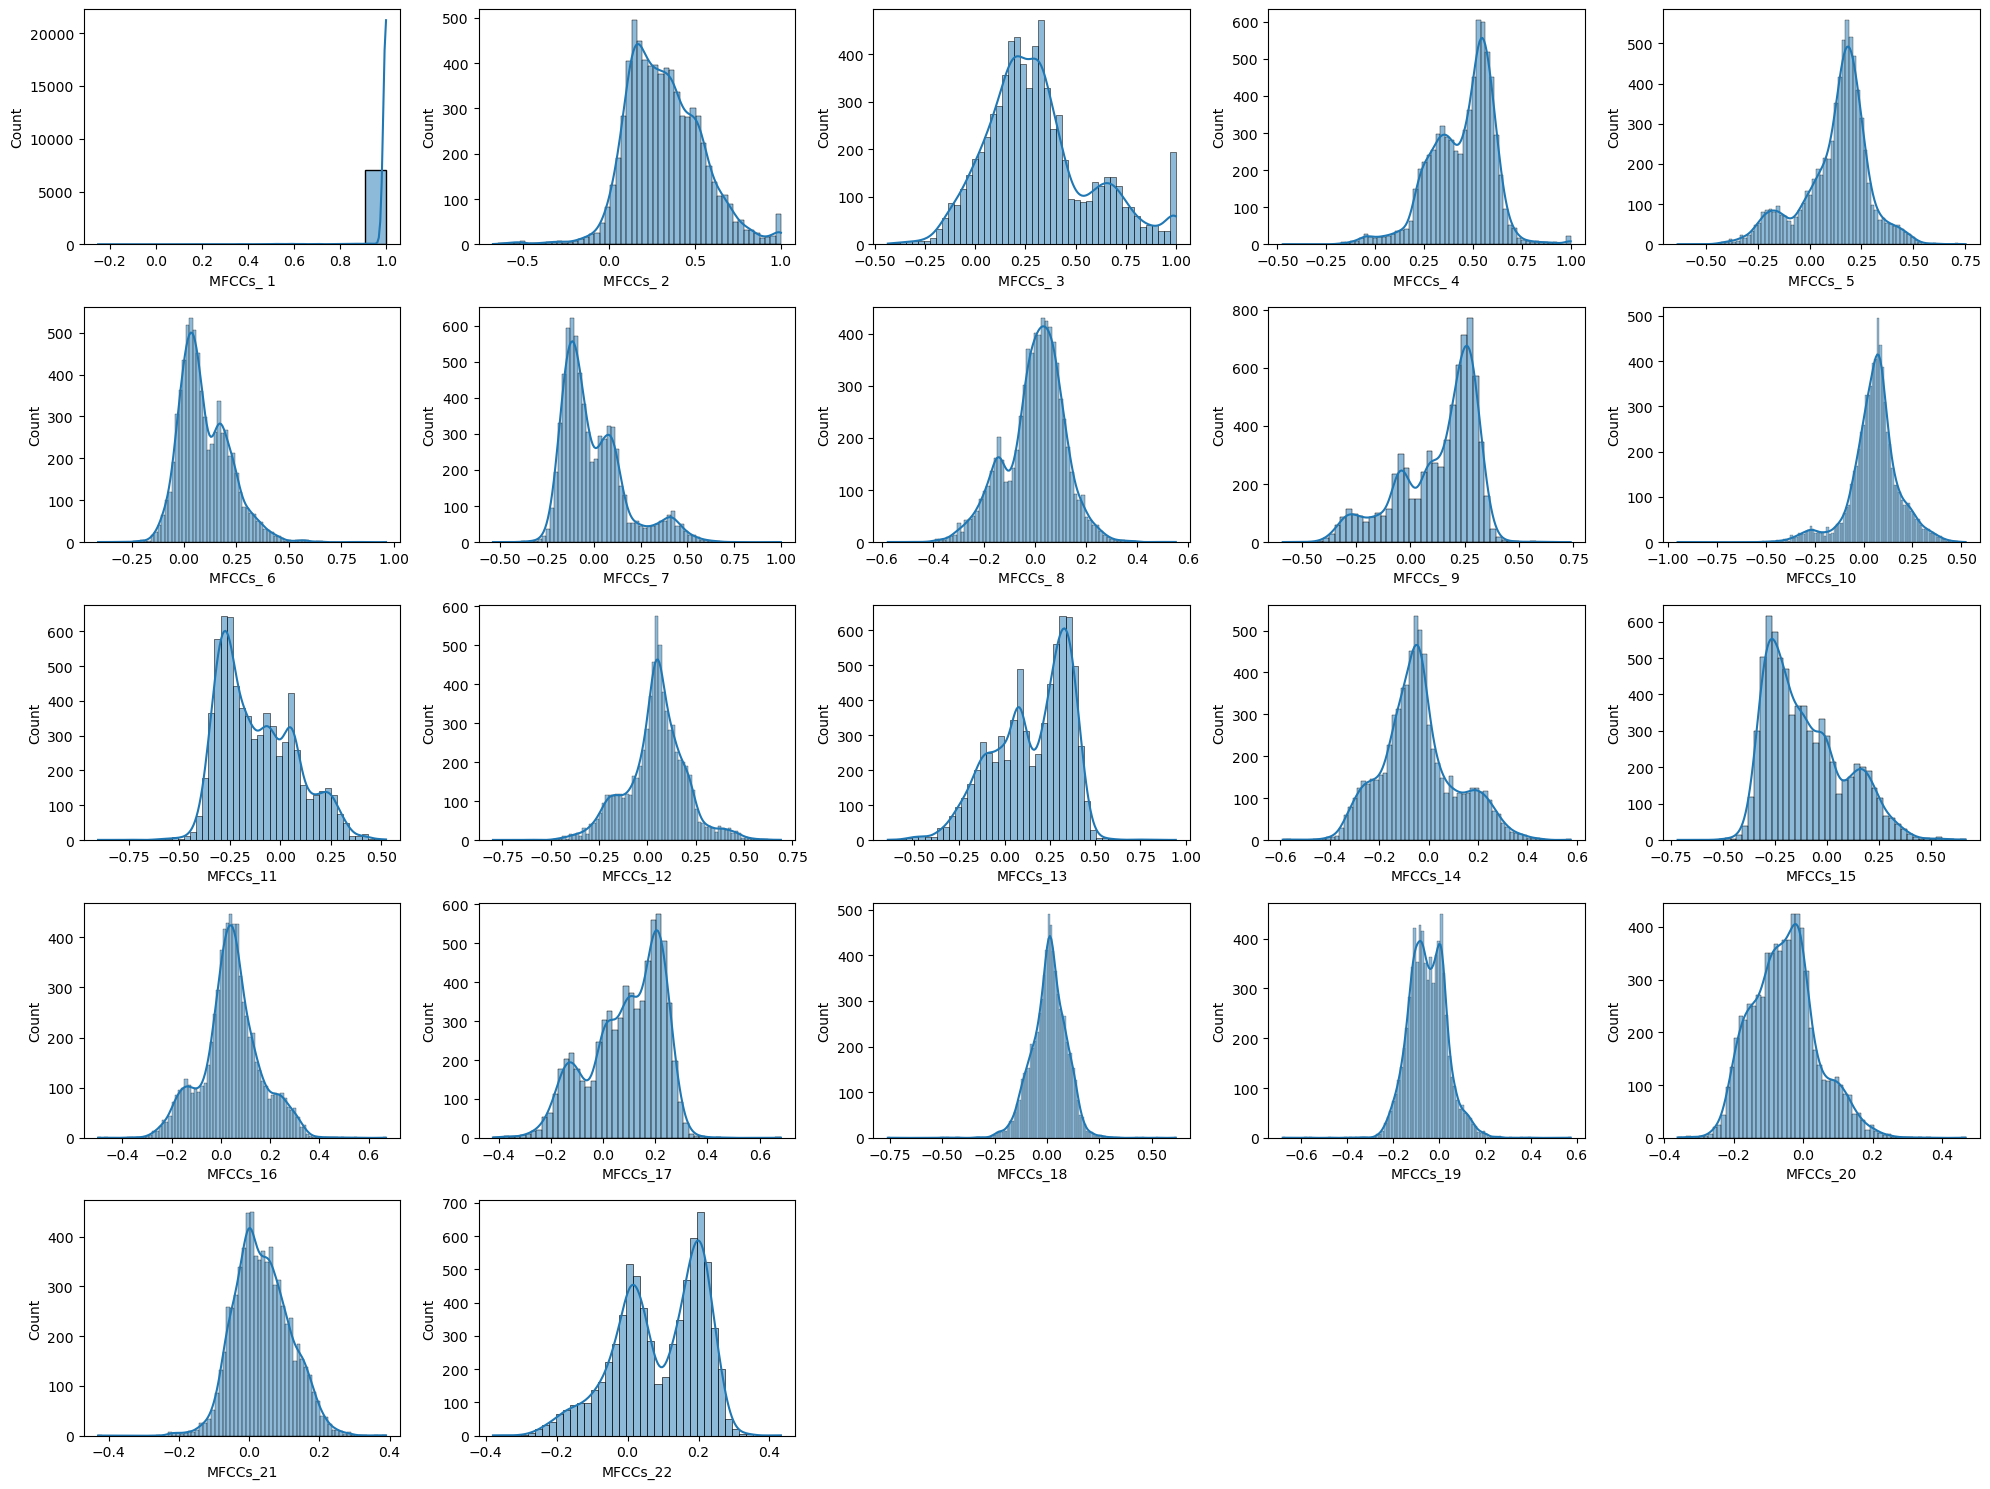

In [25]:
def beautiful_plot(df):
    plt.figure(figsize=(20, 15))
    rows, cols = (df.shape[1] + 4) // 5, 5

    for idx, column in enumerate(df.columns):
        plt.subplot(rows, cols, idx + 1)
        sns.histplot(df[column], kde=True)

    plt.tight_layout()
    plt.show()


beautiful_plot(mfcc_data)

<Axes: xlabel='Family', ylabel='count'>

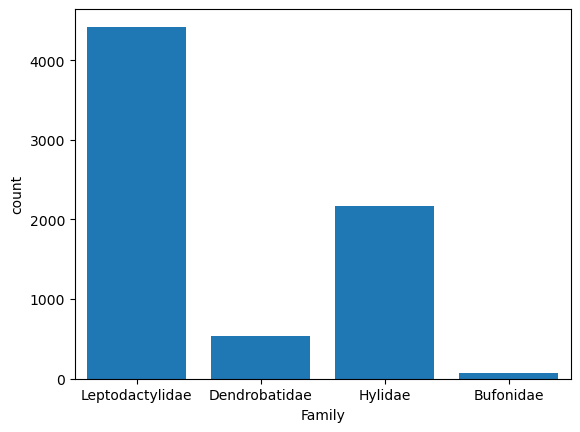

In [26]:
sns.countplot(x="Family", data=data, saturation=10)

<Axes: xlabel='Genus', ylabel='count'>

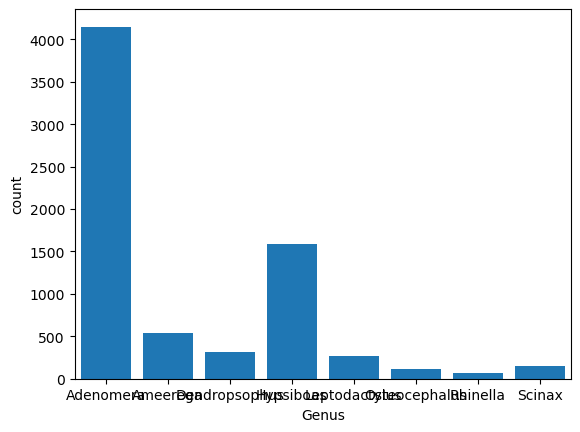

In [27]:
sns.countplot(x="Genus", data=data, saturation=10)

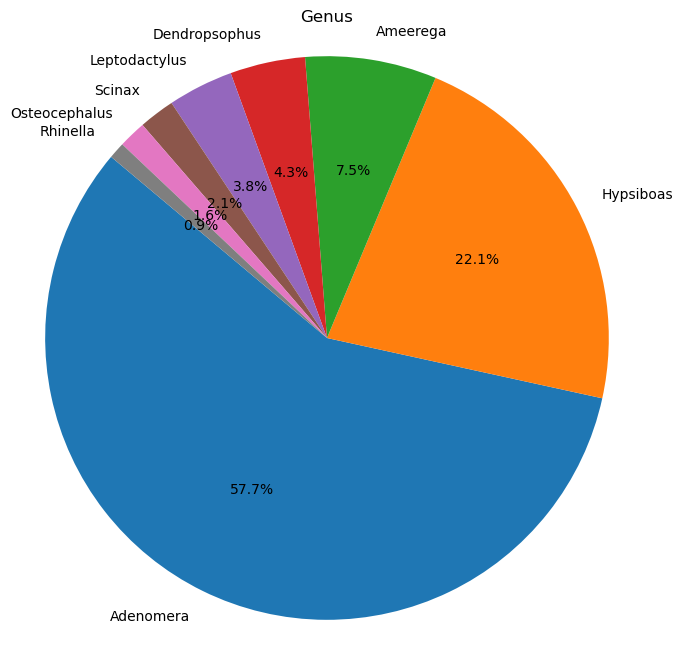

In [28]:
genus_counts = data['Genus'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(genus_counts, labels=genus_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Genus')
plt.axis('equal')
plt.show()

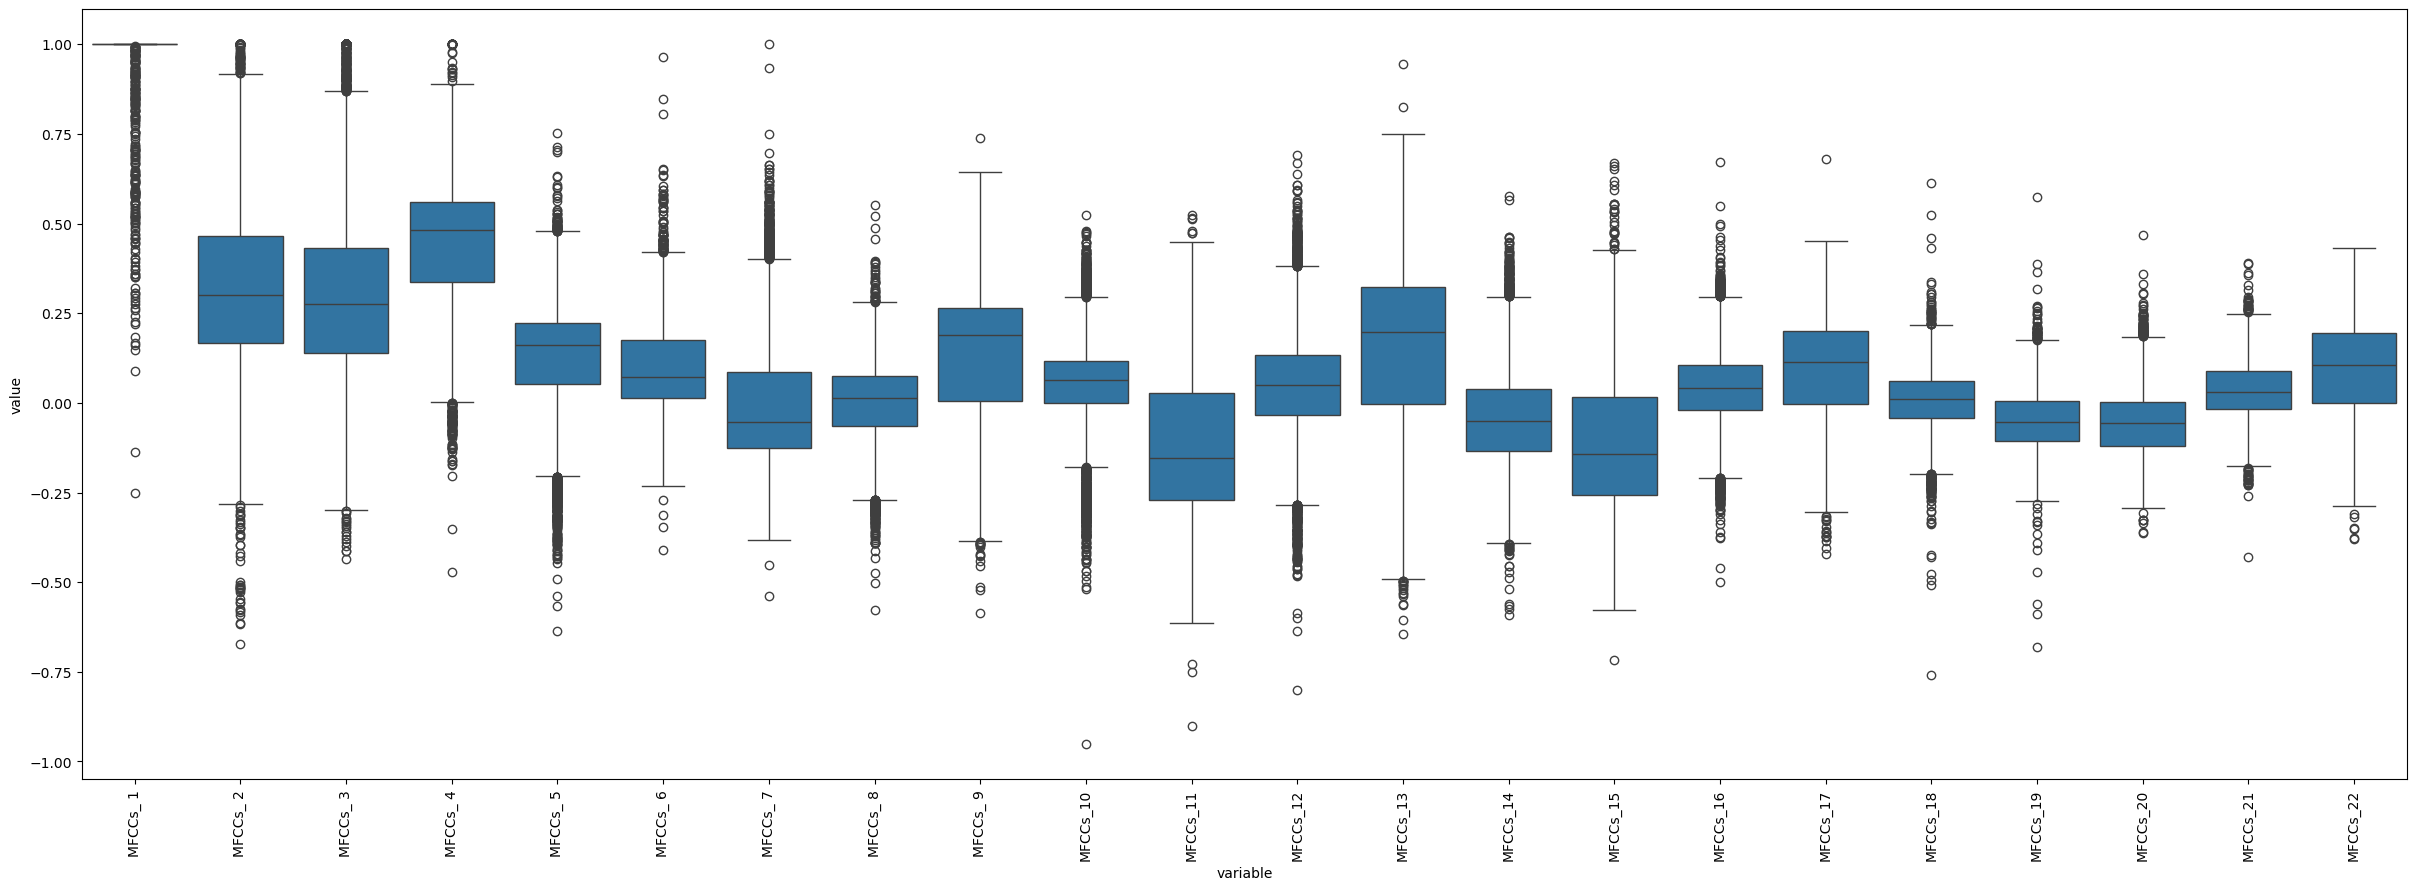

In [29]:
plt.figure(figsize=(30,10))
sns.boxplot(x="variable", y="value", data=pd.melt(mfcc_data))
plt.xticks(rotation=90)
plt.show()

In [30]:
for column in mfcc_data.columns:
    skewness = mfcc_data[column].skew()
    kurtosis = mfcc_data[column].kurtosis()
    print(f"{column}: Skewness = {skewness:.2f}, Kurtosis = {kurtosis:.2f}")

MFCCs_ 1: Skewness = -8.53, Kurtosis = 84.45
MFCCs_ 2: Skewness = 0.30, Kurtosis = 0.92
MFCCs_ 3: Skewness = 0.64, Kurtosis = 0.20
MFCCs_ 4: Skewness = -0.58, Kurtosis = 1.04
MFCCs_ 5: Skewness = -0.71, Kurtosis = 0.82
MFCCs_ 6: Skewness = 0.79, Kurtosis = 1.31
MFCCs_ 7: Skewness = 1.24, Kurtosis = 1.43
MFCCs_ 8: Skewness = -0.37, Kurtosis = 0.53
MFCCs_ 9: Skewness = -0.92, Kurtosis = 0.09
MFCCs_10: Skewness = -0.60, Kurtosis = 2.42
MFCCs_11: Skewness = 0.55, Kurtosis = -0.42
MFCCs_12: Skewness = -0.12, Kurtosis = 0.93
MFCCs_13: Skewness = -0.55, Kurtosis = -0.45
MFCCs_14: Skewness = 0.38, Kurtosis = 0.13
MFCCs_15: Skewness = 0.71, Kurtosis = -0.21
MFCCs_16: Skewness = 0.02, Kurtosis = 0.44
MFCCs_17: Skewness = -0.59, Kurtosis = -0.42
MFCCs_18: Skewness = -0.32, Kurtosis = 2.48
MFCCs_19: Skewness = 0.14, Kurtosis = 1.76
MFCCs_20: Skewness = 0.38, Kurtosis = 0.18
MFCCs_21: Skewness = 0.19, Kurtosis = 0.24
MFCCs_22: Skewness = -0.49, Kurtosis = -0.50


Original shape: (7195, 22)
Shape after removing outliers: (6472, 22)


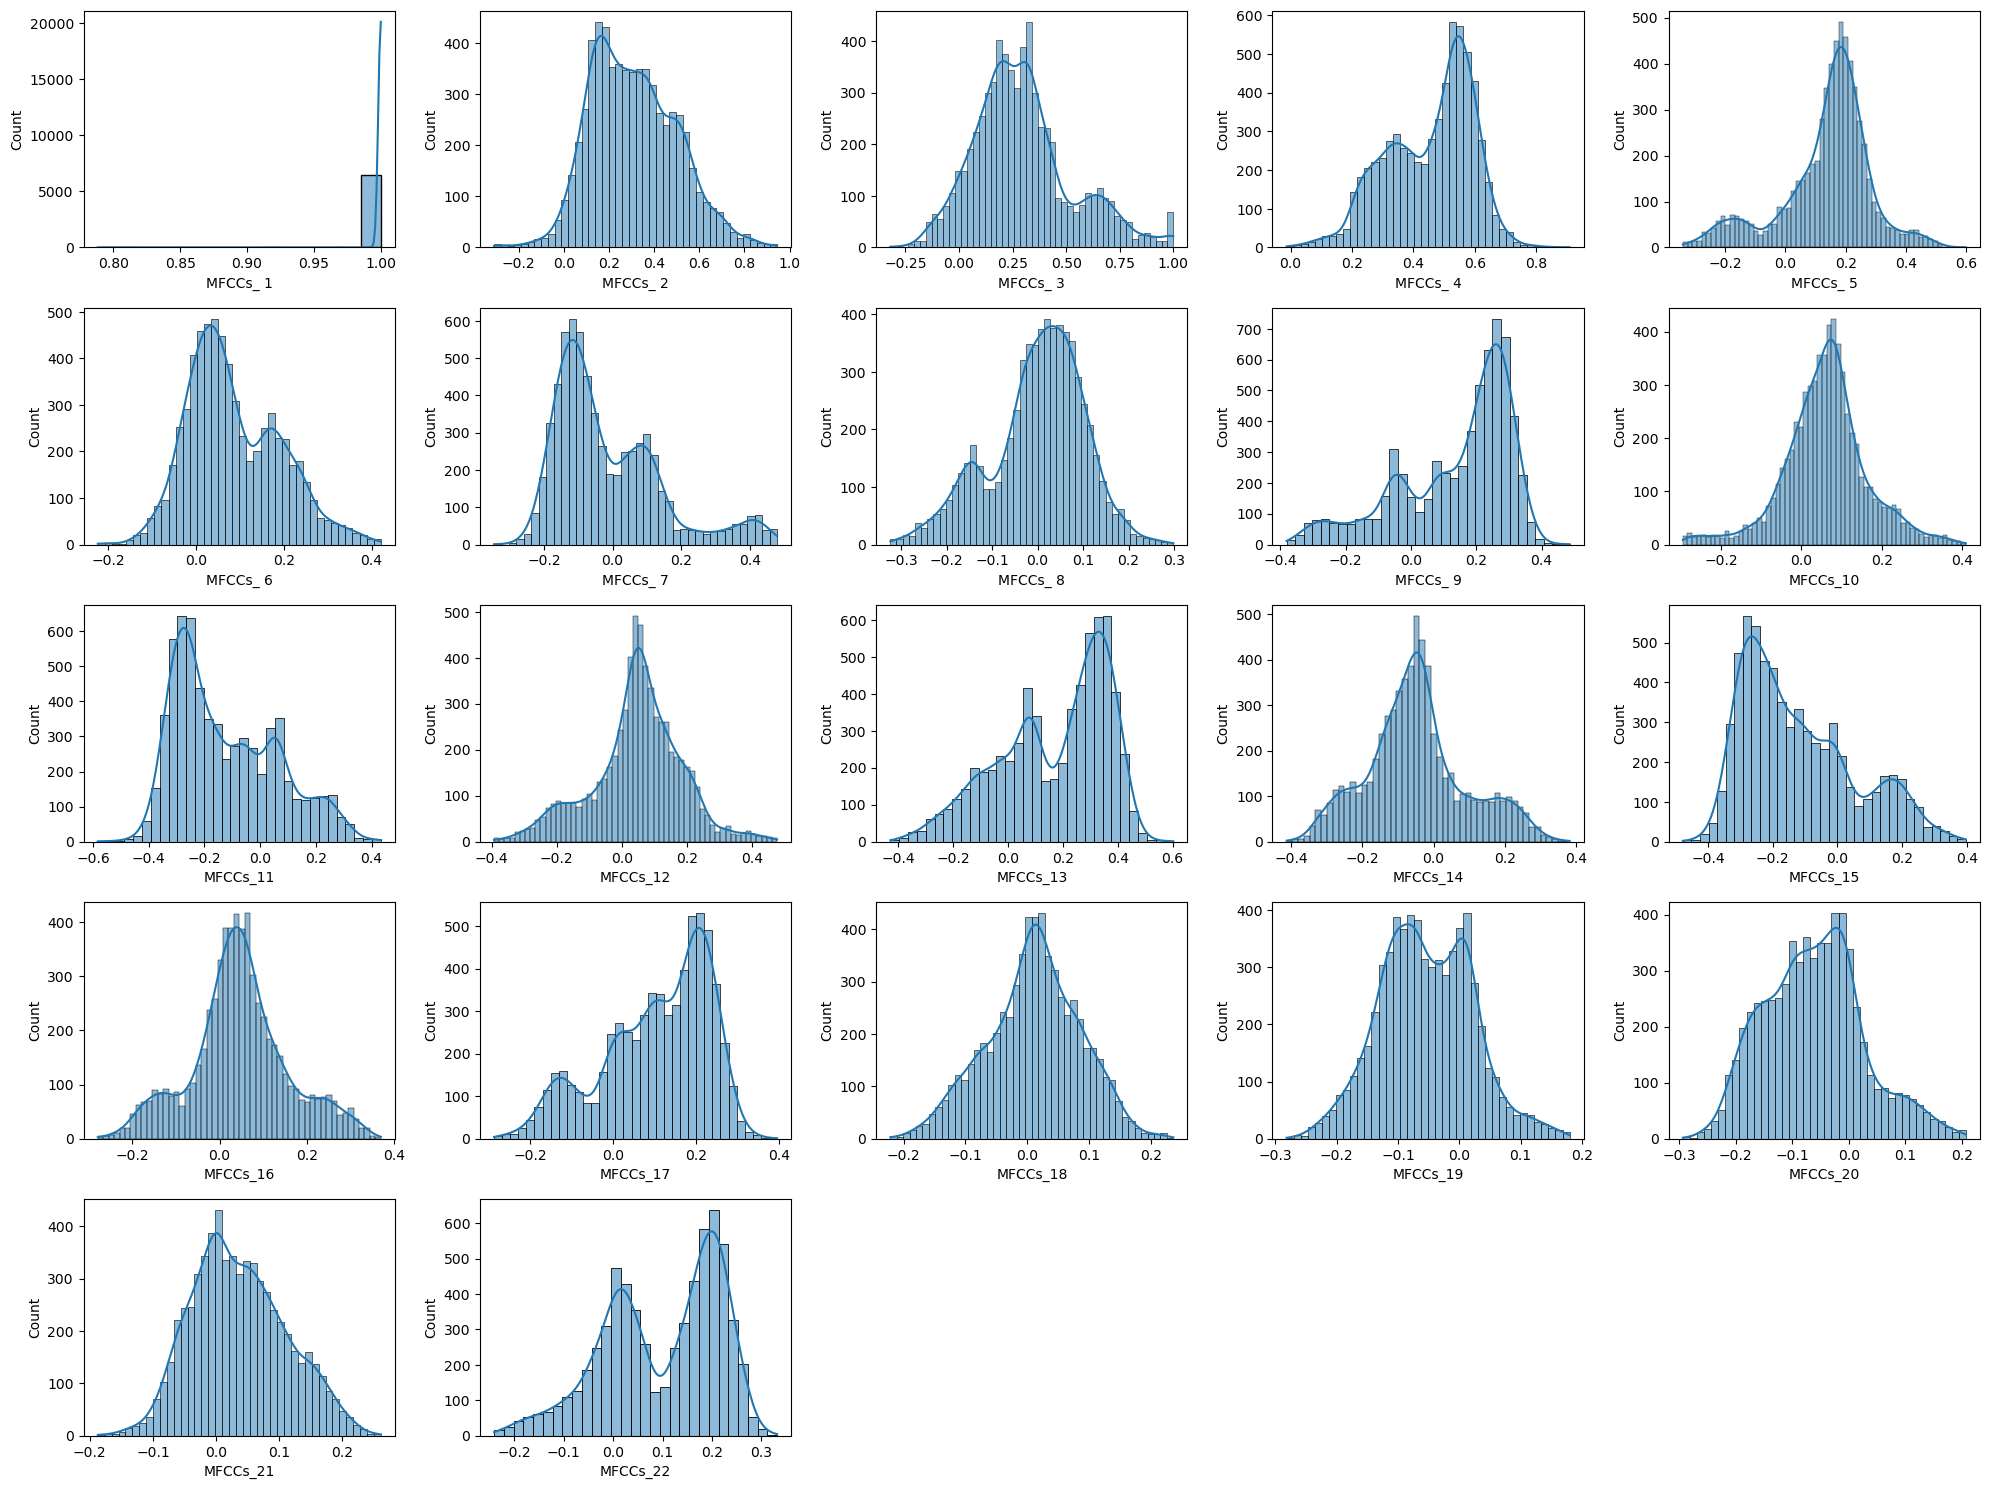

In [31]:
# For each feature, remove the outliers that are more than 3 standard deviations away from the mean
# This is done to remove the outliers from the data
# While this technique is not ideal for high dimensional data, it is a good starting point

def remove_outliers(df, columns, n_std=3):
    df_clean = df.copy()
    for column in columns:            
        # Calculate mean and standard deviation
        mean = df_clean[column].mean()
        std = df_clean[column].std()
        
        # Calculate z-scores
        z_scores = (df_clean[column] - mean) / std
        
        # Remove outliers based on z-score threshold
        df_clean = df_clean[abs(z_scores) <= n_std]
    
    return df_clean

# Remove outliers from all numeric columns
print("Original shape:", mfcc_data.shape)
mfcc_data_modified = remove_outliers(mfcc_data, mfcc_data.columns)
print("Shape after removing outliers:", mfcc_data_modified.shape)
beautiful_plot(mfcc_data_modified)

### 1.2 Data Scaling

In [53]:
mfcc_poly_df = mfcc_data_modified.copy()

"""Polynomial Features"""

# Get numeric columns only, excluding categorical features
numeric_columns = mfcc_data_modified.select_dtypes(include=['float64', 'int64']).columns

# Choose feature with lowest variance
feature_variances = mfcc_data_modified[numeric_columns].var()
lowest_variance_feature = feature_variances.sort_values(ascending=True).index[0]
print("Feature chosen for polynomial transformation (lowest variance): ", lowest_variance_feature)

# Create polynomial feature
mfcc_poly_df[lowest_variance_feature + "_squared"] = mfcc_poly_df[lowest_variance_feature] ** 2
lowest_variance_feature_squared = lowest_variance_feature + "_squared"

# Compare the variances
print("Original feature variance:", mfcc_poly_df[lowest_variance_feature].var())
print("Squared feature variance:", mfcc_poly_df[lowest_variance_feature_squared].var())

# Drop the original feature
mfcc_poly_df.drop(lowest_variance_feature, axis=1, inplace=True)

mfcc_poly_df.describe()

Feature chosen for polynomial transformation (lowest variance):  MFCCs_ 1
Original feature variance: 0.00012424350108936958
Squared feature variance: 0.00042065865489371984


,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,MFCCs_ 1_squared
count,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000,...,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000,6472.000000
mean,0.307647,0.296076,0.454717,0.136318,0.085629,-0.015564,-0.001152,0.137688,0.060188,-0.124535,...,-0.047297,-0.122631,0.045917,0.103406,0.010170,-0.054112,-0.061911,0.036545,0.098011,0.998355
std,0.189530,0.229912,0.139100,0.148953,0.105211,0.156320,0.103415,0.171937,0.104091,0.183563,...,0.139257,0.172357,0.111613,0.128085,0.075442,0.075735,0.087797,0.074705,0.116438,0.020510
min,-0.309681,-0.320006,-0.012733,-0.340247,-0.223474,-0.344937,-0.323505,-0.380777,-0.295007,-0.582448,...,-0.412967,-0.477649,-0.279310,-0.287074,-0.221353,-0.281773,-0.293647,-0.187379,-0.241138,0.621479
25%,0.161804,0.144771,0.346552,0.076256,0.010062,-0.129047,-0.056752,0.021506,0.004430,-0.274789,...,-0.132571,-0.261792,-0.013023,0.020473,-0.037737,-0.107315,-0.126704,-0.017289,0.008876,1.000000
50%,0.290462,0.268371,0.489241,0.166470,0.064210,-0.065118,0.012676,0.201007,0.063037,-0.170867,...,-0.054176,-0.166554,0.042088,0.127006,0.012837,-0.058071,-0.061969,0.029591,0.126024,1.000000
75%,0.440459,0.406084,0.561207,0.222225,0.163357,0.075840,0.070387,0.268123,0.112672,0.021524,...,0.019867,-0.013566,0.104290,0.206737,0.060850,0.001930,-0.007820,0.087086,0.198283,1.000000
max,0.944696,1.000000,0.908218,0.598381,0.421119,0.478249,0.298119,0.485847,0.409454,0.432828,...,0.381868,0.396556,0.369389,0.394156,0.236062,0.179804,0.206720,0.261192,0.331624,1.000000


### 1.3 Feature Engineering

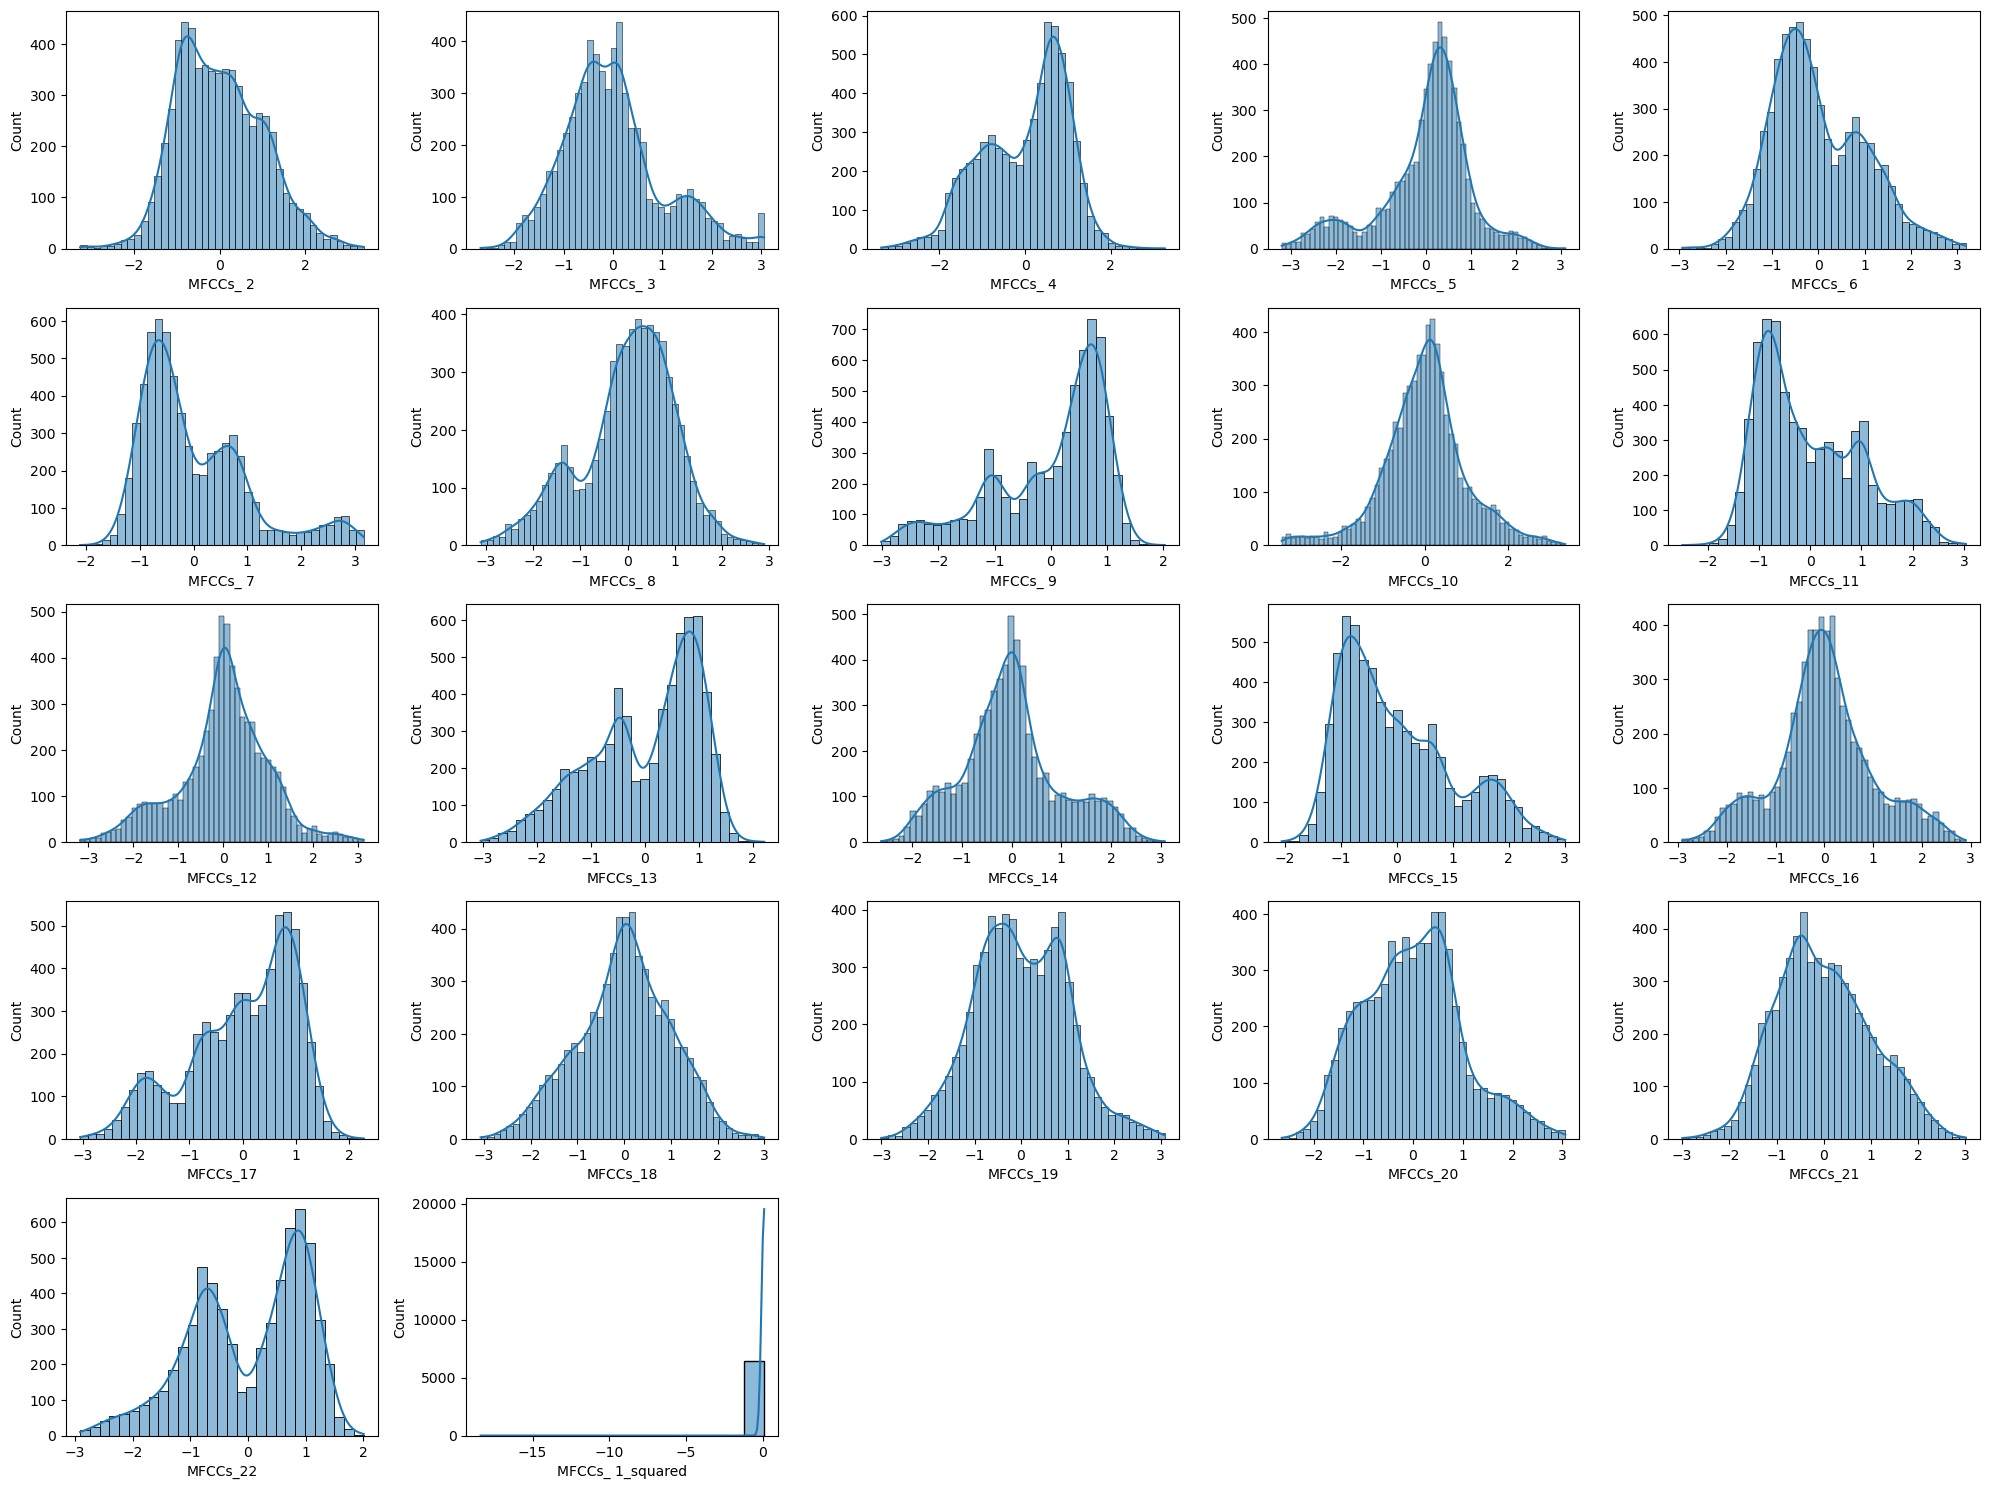

In [54]:
scaler = StandardScaler()
mfcc_scaled = scaler.fit_transform(mfcc_poly_df)
mfcc_scaled_df = pd.DataFrame(mfcc_scaled, columns=mfcc_poly_df.columns)

beautiful_plot(mfcc_scaled_df)

### 1.4. Feature Correlation Analysis

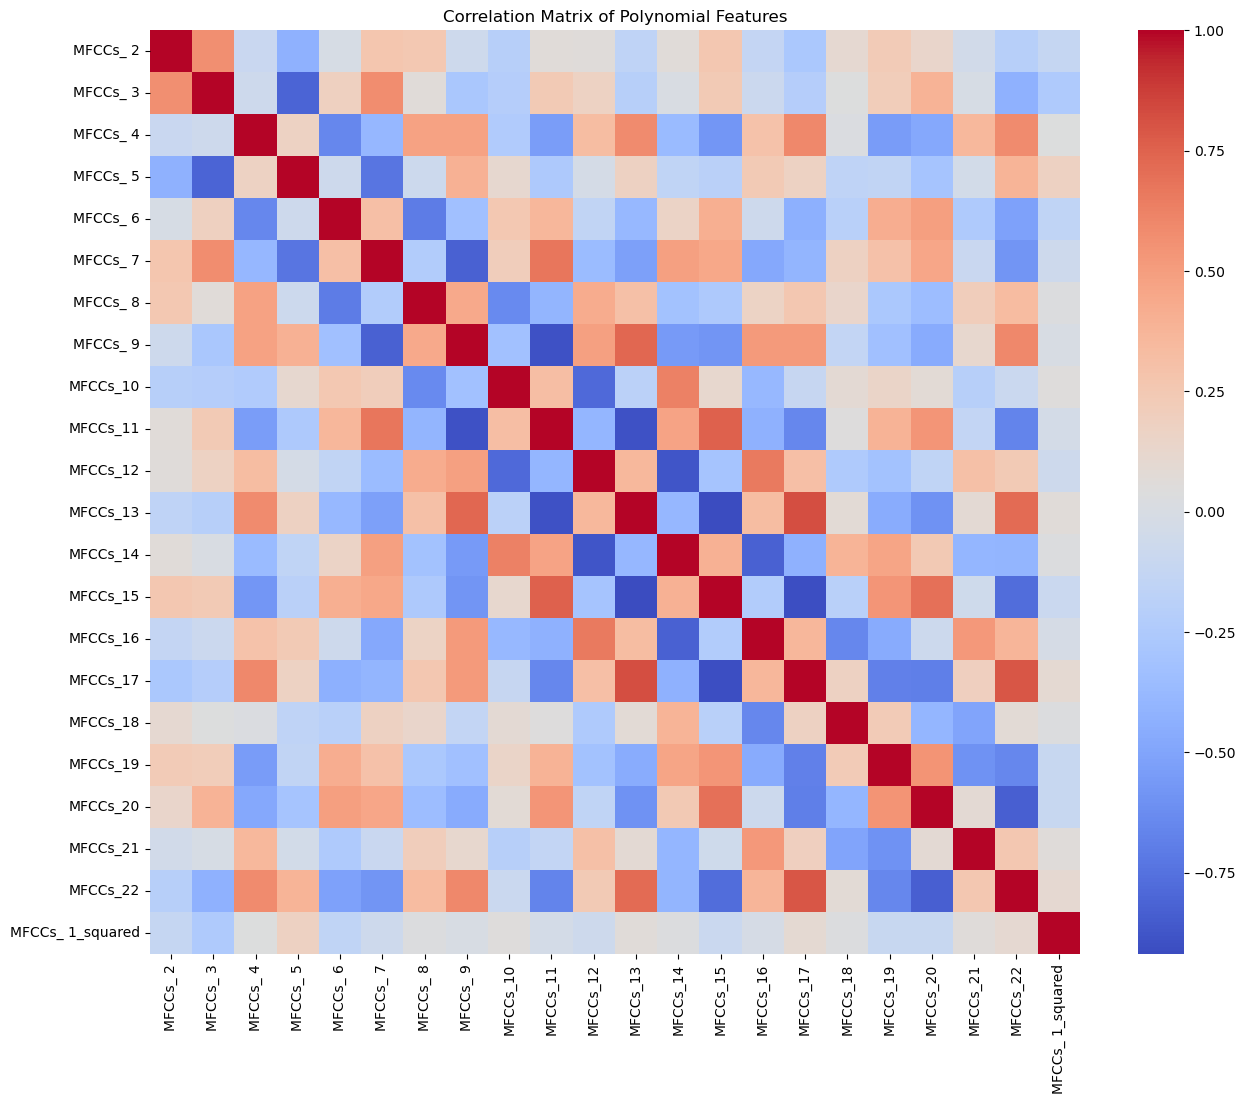

Features to drop (correlation > 0.8):
 ['MFCCs_17']


,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,MFCCs_ 1_squared
count,6.472000e+03,6.472000e+03,6.472000e+03,6.472000e+03,6.472000e+03,6.472000e+03,6.472000e+03,6.472000e+03,6.472000e+03,6.472000e+03,...,6.472000e+03,6.472000e+03,6472.000000,6.472000e+03,6.472000e+03,6.472000e+03,6.472000e+03,6.472000e+03,6.472000e+03,6.472000e+03
mean,-1.229617e-16,7.026381e-17,2.459233e-16,3.513190e-17,7.026381e-17,3.513190e-17,3.513190e-17,3.513190e-17,7.026381e-17,-1.756595e-17,...,1.317446e-16,3.513190e-17,0.000000,4.391488e-17,-1.756595e-17,-7.026381e-17,-3.513190e-17,8.782976e-17,-8.782976e-17,-5.796764e-16
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,...,1.000077e+00,1.000077e+00,1.000077,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-3.257401e+00,-2.679846e+00,-3.360776e+00,-3.199669e+00,-2.938159e+00,-2.107200e+00,-3.117306e+00,-3.015670e+00,-3.412628e+00,-2.494777e+00,...,-3.038901e+00,-2.626061e+00,-2.059947,-2.914112e+00,-3.069096e+00,-3.006253e+00,-2.639676e+00,-2.997670e+00,-2.912929e+00,-1.837669e+01
25%,-7.695610e-01,-6.581508e-01,-7.776662e-01,-4.032558e-01,-7.182971e-01,-7.260207e-01,-5.376769e-01,-6.757781e-01,-5.357075e-01,-8.186050e-01,...,-7.044671e-01,-6.123993e-01,-0.807467,-5.281168e-01,-6.350576e-01,-7.025455e-01,-7.380512e-01,-7.206702e-01,-7.655762e-01,8.021447e-02
50%,-9.068181e-02,-1.205140e-01,2.482144e-01,2.024472e-01,-2.035967e-01,-3.170271e-01,1.337312e-01,3.682951e-01,2.737316e-02,-2.524245e-01,...,2.928690e-01,-4.940126e-02,-0.254860,-3.430761e-02,3.536260e-02,-5.227660e-02,-6.657586e-04,-9.309240e-02,2.406050e-01,8.021447e-02
75%,7.007936e-01,4.785149e-01,7.656192e-01,5.767832e-01,7.388359e-01,5.847710e-01,6.918210e-01,7.586799e-01,5.042494e-01,7.957491e-01,...,8.336300e-01,4.823412e-01,0.632835,5.230363e-01,6.718255e-01,7.400301e-01,6.161342e-01,6.765907e-01,8.612261e-01,8.021447e-02
max,3.361457e+00,3.061941e+00,3.260491e+00,3.102308e+00,3.188974e+00,3.159226e+00,2.894098e+00,2.025076e+00,3.355665e+00,3.036588e+00,...,2.214636e+00,3.082051e+00,3.012515,2.898379e+00,2.994456e+00,3.088847e+00,3.059925e+00,3.007365e+00,2.006491e+00,8.021447e-02


In [55]:
# Step 1: Compute correlation matrix
correlation_matrix = mfcc_scaled_df.corr()

# Step 2: Plot heatmap to visualize correlations
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix of Polynomial Features")
plt.show()

# Step 3: Identify highly correlated features to drop
threshold = 0.8

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation above the threshold
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
print(f"Features to drop (correlation > {threshold}):\n", to_drop)

# Drop the identified features
mfcc_reduced_df = mfcc_scaled_df.drop(columns=to_drop)

mfcc_reduced_df.describe()

## 2. K-Means Clustering

### 2.1 Elbow Method

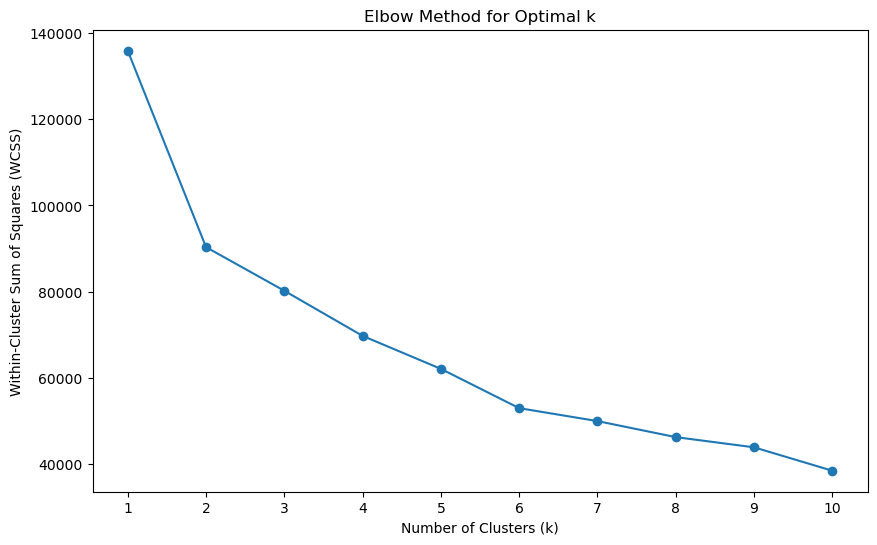

In [56]:
# Define a range of possible cluster numbers to test (e.g., 1 to 10)
k_range = range(1, 11)
wcss = []  # List to store the WCSS (Within-Cluster Sum of Squares) for each k

# Run KMeans for each k and calculate WCSS
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mfcc_reduced_df)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS for KMeans

# Plot the WCSS values for each k
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_range)
plt.show()

### 2.2 Silhouette Score Evaluation

The Silhouette Score ranges from -1 to 1:
- A score close to 1 indicates that the sample is well-matched to its own cluster and poorly matched to neighboring clusters.
- A score close to 0 indicates overlapping clusters.
- A score close to -1 suggests that samples may be in the wrong clusters.

In [77]:
# Set the optimal number of clusters
optimal_k = 4  # Elbow Point

# Run K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(mfcc_reduced_df)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(mfcc_reduced_df, cluster_labels)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg:.4f}")

Silhouette Score for 4 clusters: 0.3782


### 2.3 Cluster Implementation

In [78]:
# Add the cluster labels to a copy of the original DataFrame
mfcc_clustered_df = mfcc_reduced_df.copy()
mfcc_clustered_df['Cluster'] = cluster_labels

cluster_counts = mfcc_clustered_df['Cluster'].value_counts()
print("Cluster counts:\n", cluster_counts)

Cluster counts:
 Cluster
0    3497
1    2249
3     374
2     352
Name: count, dtype: int64


### 2.4 Cluster Initialization

In [79]:
# K-Means with Random Initialization
kmeans_random = KMeans(n_clusters=optimal_k, init='random', random_state=42)
labels_random = kmeans_random.fit_predict(mfcc_reduced_df)
silhouette_random = silhouette_score(mfcc_reduced_df, labels_random)

# K-Means with K-Means++ Initialization
kmeans_kmeans_plus = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
labels_kmeans_plus = kmeans_kmeans_plus.fit_predict(mfcc_reduced_df)
silhouette_kmeans_plus = silhouette_score(mfcc_reduced_df, labels_kmeans_plus)

# Output the Silhouette Scores
print(f"Silhouette Score with Random Initialization: {silhouette_random:.4f}")
print(f"Silhouette Score with K-Means++ Initialization: {silhouette_kmeans_plus:.4f}")


Silhouette Score with Random Initialization: 0.3781
Silhouette Score with K-Means++ Initialization: 0.3782


## 3. Cluster Visualization

### 3.1 Dimensionality Reduction

In [60]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(mfcc_reduced_df)

# Create a DataFrame for the PCA result
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = labels_kmeans_plus  # Add cluster labels

### 3.2 Cluster Plots

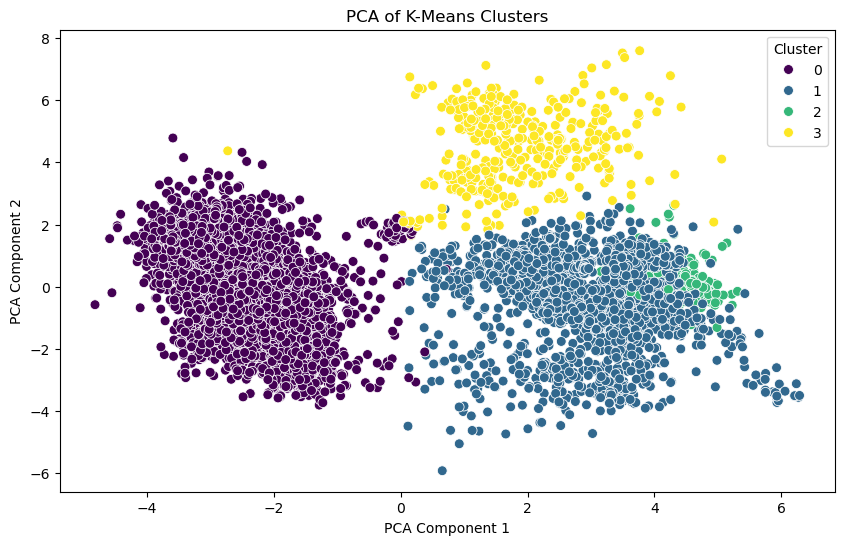

In [61]:
# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50)
plt.title("PCA of K-Means Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

### 3.3 Feature Contribution

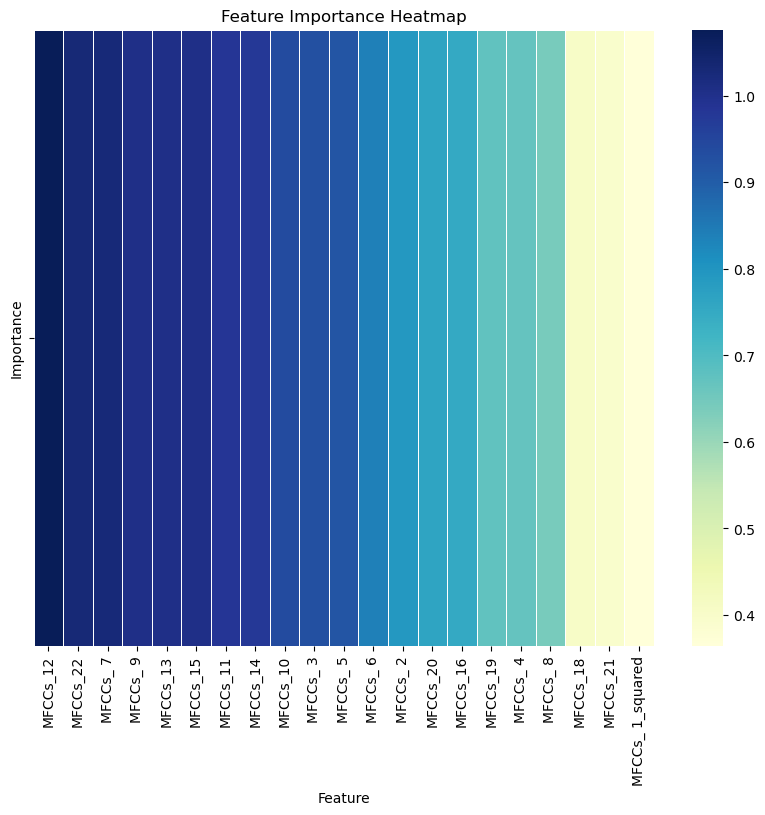


Top 10 Most Important Features:


,Feature,Importance
10,MFCCs_12,1.076432
19,MFCCs_22,1.031444
5,MFCCs_ 7,1.028282
7,MFCCs_ 9,1.006708
11,MFCCs_13,1.005805
13,MFCCs_15,1.004269
9,MFCCs_11,0.982822
12,MFCCs_14,0.977568
8,MFCCs_10,0.938609
1,MFCCs_ 3,0.927625


In [86]:
# Calculate the centroids of the clusters
centroids = kmeans_kmeans_plus.cluster_centers_

# Calculate the absolute mean difference of each feature across centroids
feature_importance = np.abs(centroids).mean(axis=0)

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': mfcc_reduced_df.columns,
    'Importance': feature_importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(feature_importance_df.set_index('Feature').T, 
            cmap="YlGnBu", 
            cbar=True, 
            linewidths=.5)
plt.title("Feature Importance Heatmap")
plt.show()

print("\nTop 10 Most Important Features:")
feature_importance_df.head(10)

## 4. Cluster Evaluation Metrics

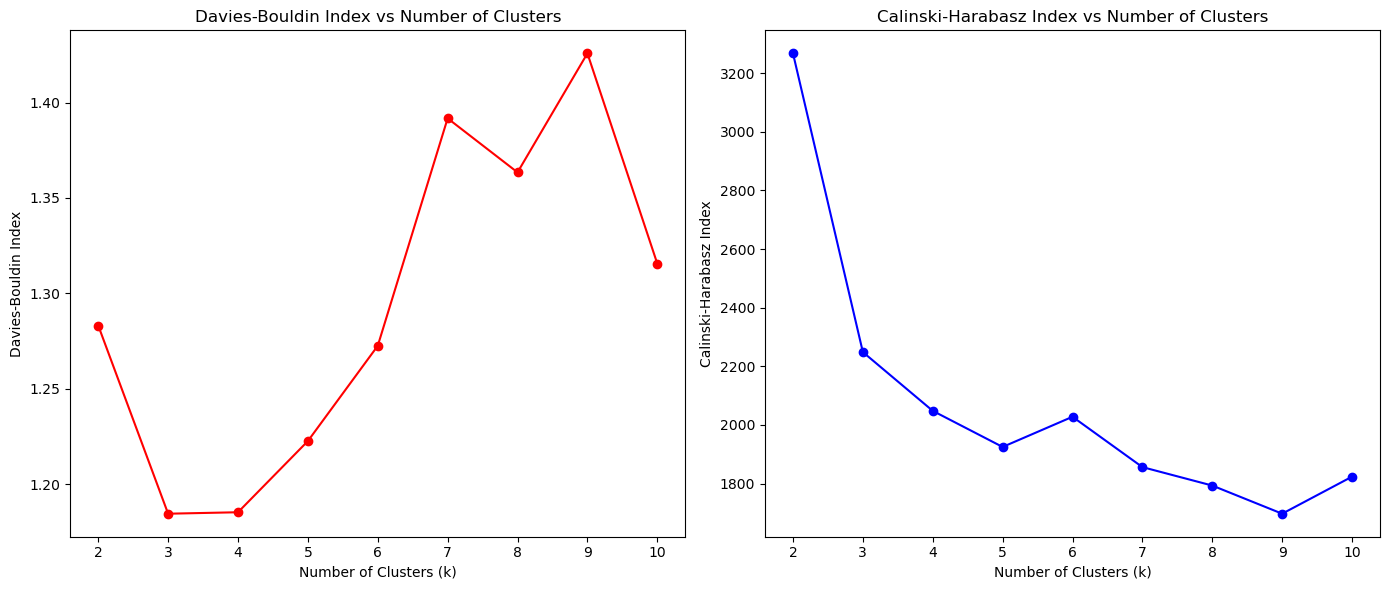

In [97]:
# Define a range of cluster numbers to evaluate
k_range = range(2, 11)

# Lists to store metrics for each k
db_scores = []
ch_scores = []

for k in k_range:
    # Fit K-Means clustering
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(mfcc_reduced_df)
    
    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(mfcc_reduced_df, labels)
    db_scores.append(db_index)
    
    # Calculate Calinski-Harabasz Index
    ch_index = calinski_harabasz_score(mfcc_reduced_df, labels)
    ch_scores.append(ch_index)

# Plotting the metrics
plt.figure(figsize=(14, 6))

# Davies-Bouldin Index
plt.subplot(1, 2, 1)
plt.plot(k_range, db_scores, marker='o', color='r')
plt.title("Davies-Bouldin Index vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.xticks(k_range)

# Calinski-Harabasz Index
plt.subplot(1, 2, 2)
plt.plot(k_range, ch_scores, marker='o', color='b')
plt.title("Calinski-Harabasz Index vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski-Harabasz Index")
plt.xticks(k_range)

plt.tight_layout()
plt.show()

## 5. Comparison with other Clustering Algorithms

### 5.1 Agglomerative Clustering

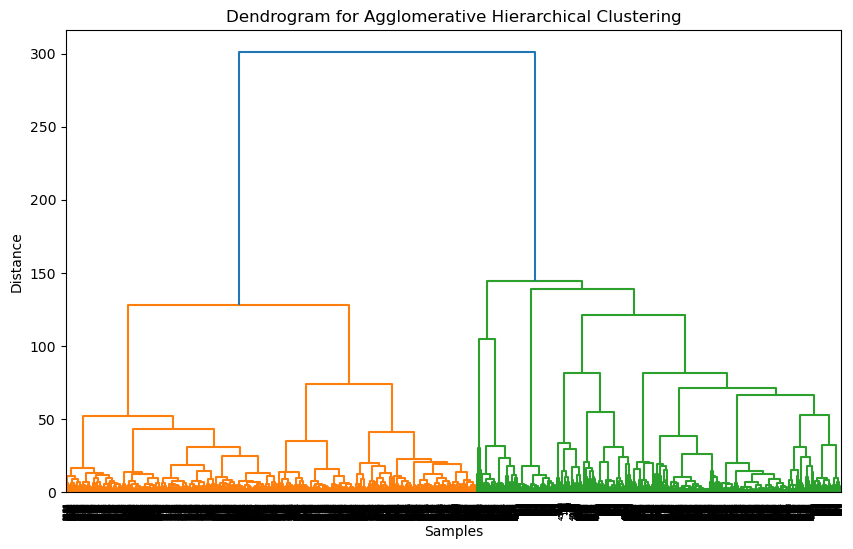

Silhouette Score for Agglomerative Hierarchical Clustering: 0.37


In [88]:
# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)  # Use optimal_k from K-Means
agg_labels = agg_clustering.fit_predict(mfcc_reduced_df)

# Plotting Dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(mfcc_reduced_df, method='ward'))
plt.title("Dendrogram for Agglomerative Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Evaluate Clustering
agg_silhouette = silhouette_score(mfcc_reduced_df, agg_labels)
print(f"Silhouette Score for Agglomerative Hierarchical Clustering: {agg_silhouette:.2f}")

### 5.2 DBSCAN

In [89]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(mfcc_reduced_df)

# Evaluate Clustering
dbscan_silhouette = silhouette_score(mfcc_reduced_df, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f"Silhouette Score for DBSCAN: {dbscan_silhouette:.2f}")

Silhouette Score for DBSCAN: -0.17


### 5.3 Comparison of Cluster Results

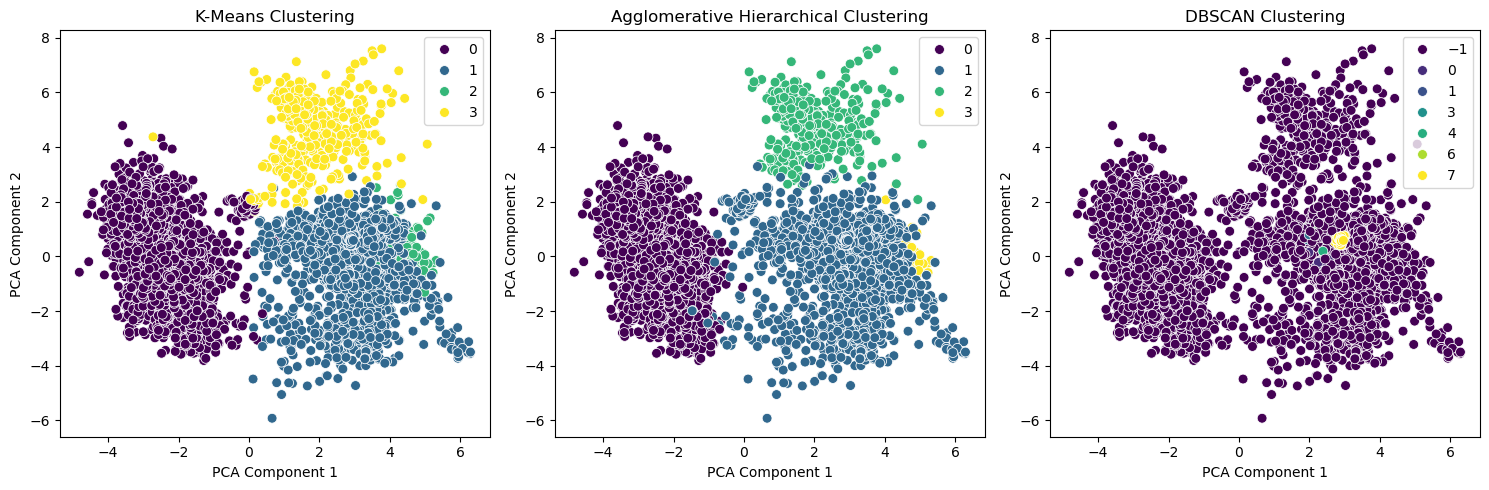

In [90]:
# Create a PCA for visualization (as before)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(mfcc_reduced_df)

# Plot K-Means results
plt.figure(figsize=(15, 5))

# K-Means Clustering
plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels_kmeans_plus, palette='viridis', s=50)
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Agglomerative Clustering
plt.subplot(1, 3, 2)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=agg_labels, palette='viridis', s=50)
plt.title("Agglomerative Hierarchical Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# DBSCAN
plt.subplot(1, 3, 3)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=dbscan_labels, palette='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

#### Strengths and Weaknesses of Each Algorithm
1. K-Means
- Strengths:
    - Fast and efficient for large datasets.
    - Works well with spherical clusters.
    - Simple to understand and implement.
- Weaknesses:
    - Sensitive to initialization (although K-Means++ helps).
    - Requires the number of clusters to be specified beforehand.
    - Assumes clusters are of similar sizes and densities.

2. Agglomerative Hierarchical Clustering
- Strengths:
    - Does not require a predefined number of clusters (you can cut the dendrogram at the desired level).
    - Produces a hierarchy of clusters, which can provide insights into data structure.
    - Can capture clusters of different shapes and sizes.
- Weaknesses:
    - Computationally expensive for large datasets (complexity is O(n3)O(n3)).
    - Sensitive to noise and outliers.

3. DBSCAN
- Strengths:
    - Can find arbitrarily shaped clusters and is robust to noise.
    - Does not require specifying the number of clusters a priori.
- Weaknesses:
    - Requires careful tuning of parameters (epsilon and min_samples).
    - May struggle with clusters of varying densities.
    - Performance can degrade with high-dimensional data.